EDA Student Performance Indicator: <br>
1) Problem statement: <br>
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.<br>
2) Data Collection: <br>
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977<br>
The data consists of 8 column and 1000 rows.<br>
3) Dataset Information: <br>
->gender : sex of students -> (Male/female)<br>
->race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)<br>
->parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)<br>
->lunch : having lunch before test (standard or free/reduced)<br>
->test preparation course : complete or not complete before test<br>
->math score<br>
->reading score<br>
->writing score<br>

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [108]:
# read the dataset
df=pd.read_csv('stud.csv')

In [109]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [110]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [111]:
df.shape

(1000, 8)

### Data Checks to perform: <br>
Check Missing values<br>
Check Duplicates<br>
Check data type<br>
Check the number of unique values of each column<br>
Check statistics of data set<br>
Check various categories present in the different categorical column<br>

In [112]:
## cheak missing values
df.isnull().sum()     # find out the total missing values

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [113]:
df.isna().sum()         # same as df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### Insights or Observation: <br>
There are no missing values

In [114]:
# cheak duplicate values
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [115]:
df.duplicated().sum()

0

There are no duplicate values in the data set

In [116]:
# cheak data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [117]:
# cheaking the no of uniques values in each columns
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [118]:
# cheak the statistics of the dataset
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insights or Observation: <br>
From the above description of numerical data,all means are very close to each other- between 66 and 69<br>
All the standard deviation are also close- between 14.6- 15.19<br>
While there is a minimum of 0 for maths,other are having 17 and 10 value<br>

In [119]:
#Explore more about the data
df.head(-6)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
989,female,group D,some college,free/reduced,completed,67,86,83
990,male,group E,high school,free/reduced,completed,86,81,75
991,female,group B,some high school,standard,completed,65,82,78
992,female,group D,associate's degree,free/reduced,none,55,76,76


In [120]:
df.head(15)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [121]:
df.tail(12)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
988,female,group A,some high school,free/reduced,none,44,45,45
989,female,group D,some college,free/reduced,completed,67,86,83
990,male,group E,high school,free/reduced,completed,86,81,75
991,female,group B,some high school,standard,completed,65,82,78
992,female,group D,associate's degree,free/reduced,none,55,76,76
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
994,male,group A,high school,standard,none,63,63,62
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65


In [122]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [123]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [124]:
[feature for feature in df.columns]

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course',
 'math_score',
 'reading_score',
 'writing_score']

In [125]:
#segrregate numerical and categorical features
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']   # only numerical features
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']   # categorical features

In [126]:
numerical_features

['math_score', 'reading_score', 'writing_score']

In [127]:
categorical_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [128]:
df['gender'].value_counts()   #Return a Series containing counts of unique values.
                              #The resulting object will be in descending order so that the first element is the most frequently-occurring element. Excludes NA values by default.

gender
female    518
male      482
Name: count, dtype: int64

In [129]:
df['race_ethnicity'].value_counts()

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [130]:
# aggregate the total score with mean
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['Average_score']=df['total_score']/3

In [131]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


(<Figure size 640x480 with 1 Axes>, <Axes: >)

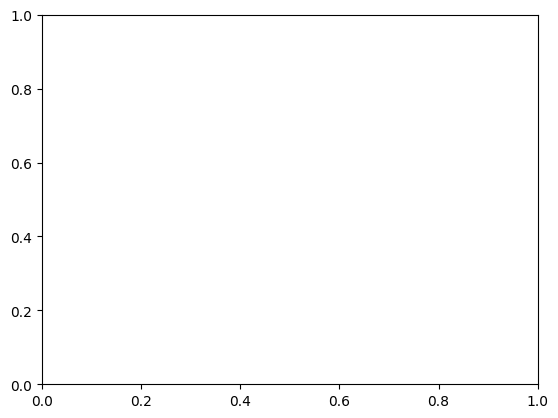

In [132]:
## Explore more visualization
plt.subplots()    

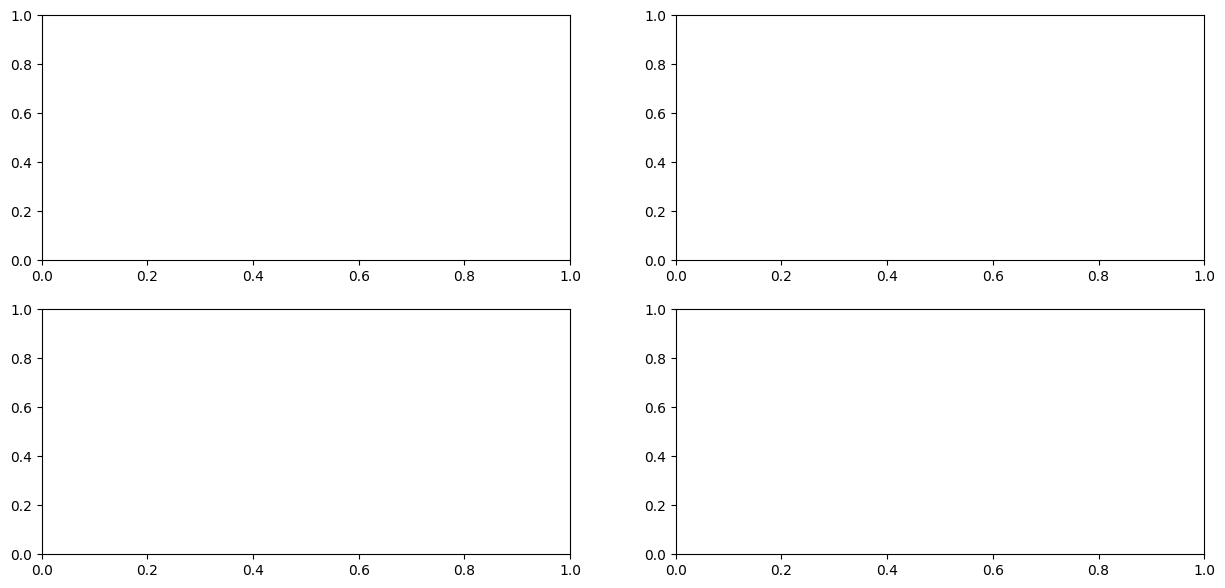

In [133]:
fig,axis=plt.subplots(2,2,figsize=(15,7))

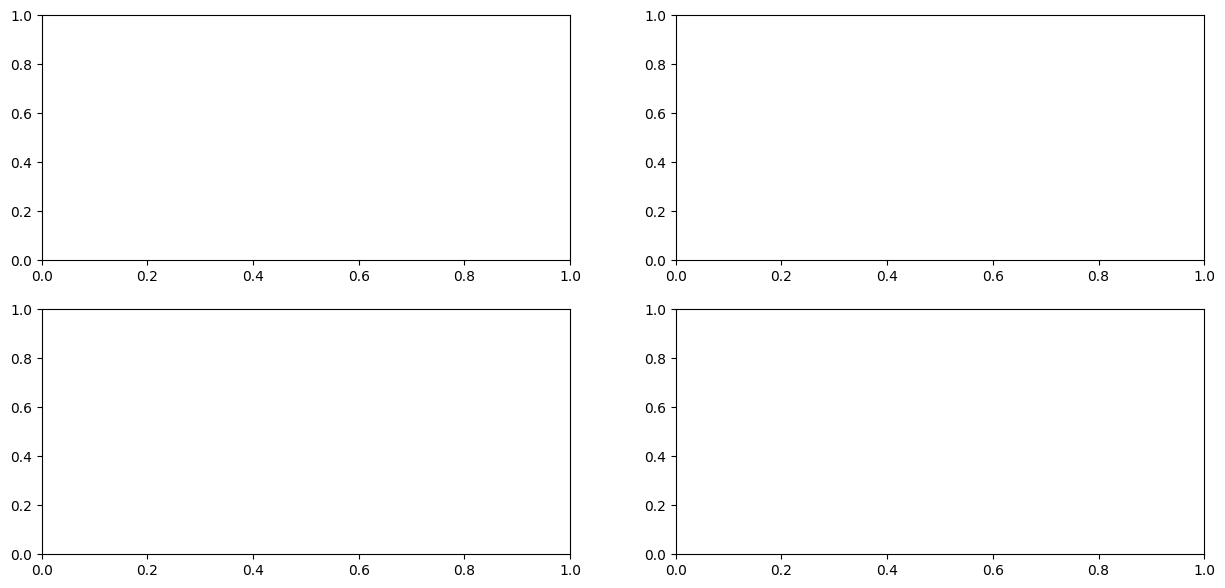

In [134]:
fig

In [135]:
axis

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

<Axes: xlabel='Average_score', ylabel='Count'>

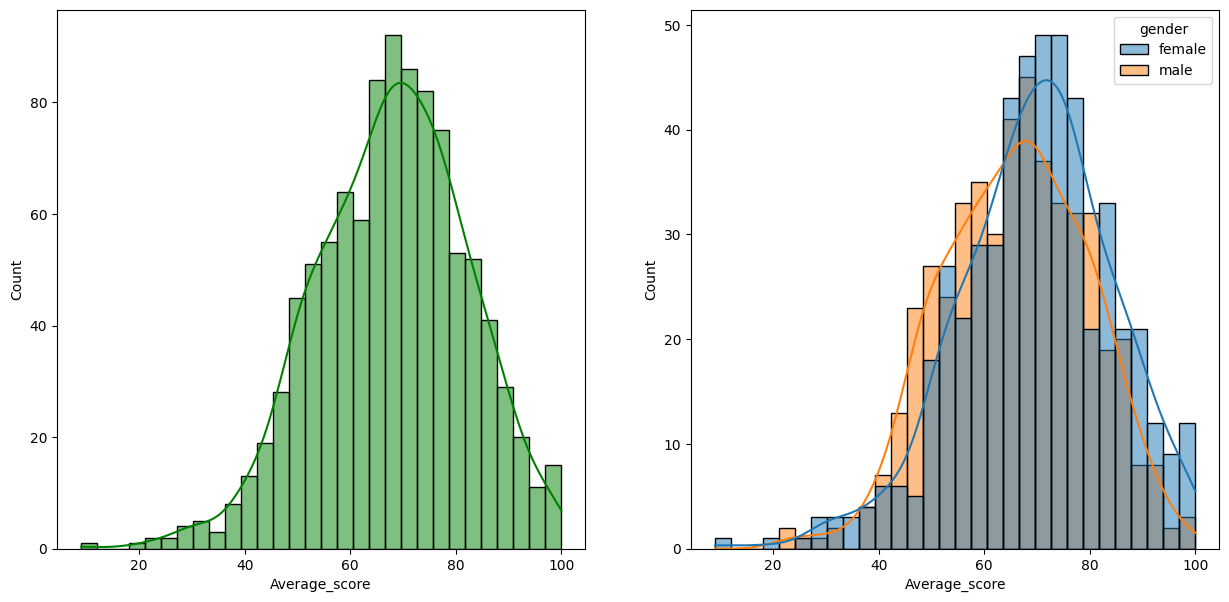

In [136]:
fig,axis=plt.subplots(1,2,figsize=(15,7))  #This line creates a figure (fig) and a set of subplots (axis) in a 1x2 grid.The figsize=(15, 7) argument sets the size of the entire figure to be 15 inches in width and 7 inches in height.
plt.subplot(121)    #The number 121 is shorthand for a 1x2 grid, and this subplot refers to the first position.
sns.histplot(data=df,x='Average_score',bins=30,kde=True,color='g')  # bins=30 sets the number of bins in the histogram to 30. kde=True adds a Kernel Density Estimate plot to the histogram.
plt.subplot(122)
sns.histplot(data=df,x='Average_score',bins=30,hue='gender',kde=True)

#### Insights: <br>
Female student tend to perform well than male students

<Axes: xlabel='Average_score', ylabel='Count'>

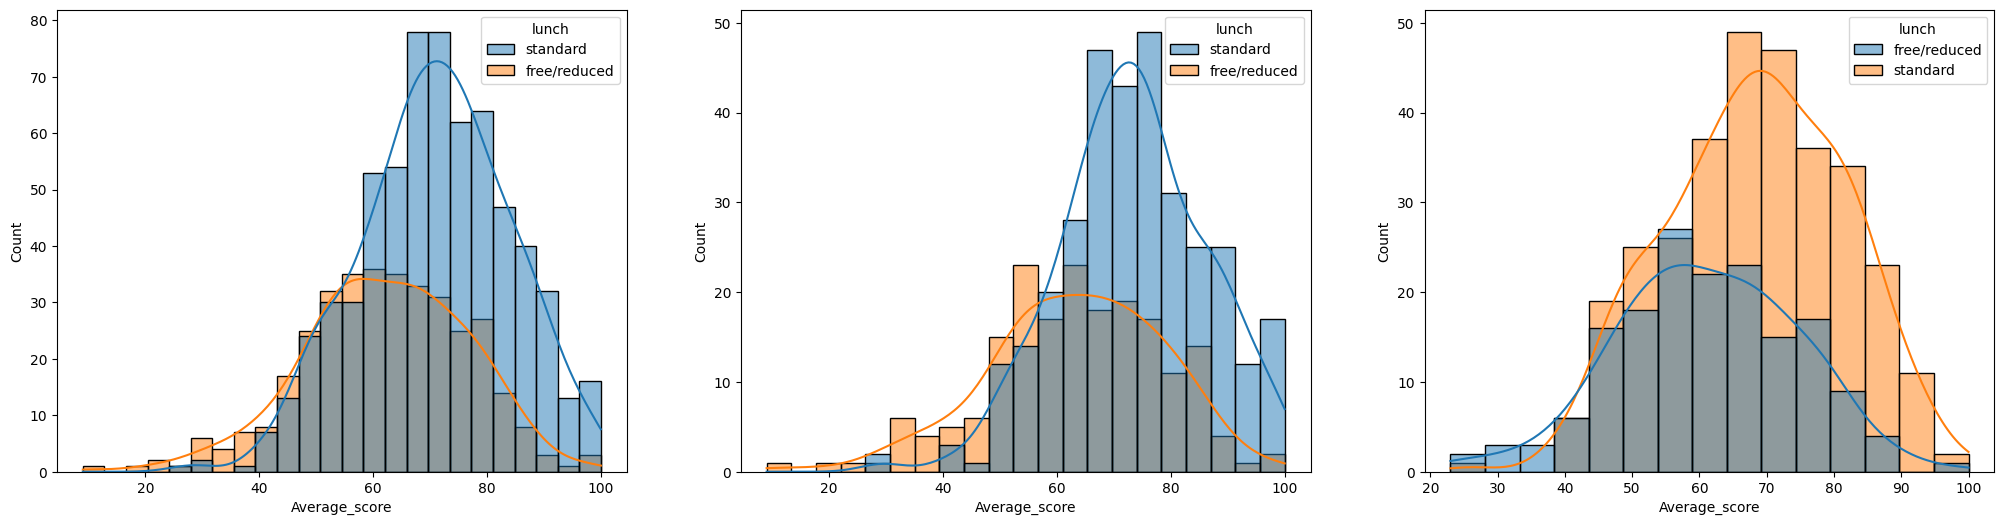

In [137]:
fig,axis=plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='Average_score',kde=True,hue='lunch')   # for all the student male and female
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='Average_score',kde=True,hue='lunch')          # only for female
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='Average_score',kde=True,hue='lunch')

#### Insights: <br>
Standard Lunch help students perform well in exams<br>
Standard lunch helps perform well in exams be it a male of female<br>

In [138]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<Axes: xlabel='Average_score', ylabel='Count'>

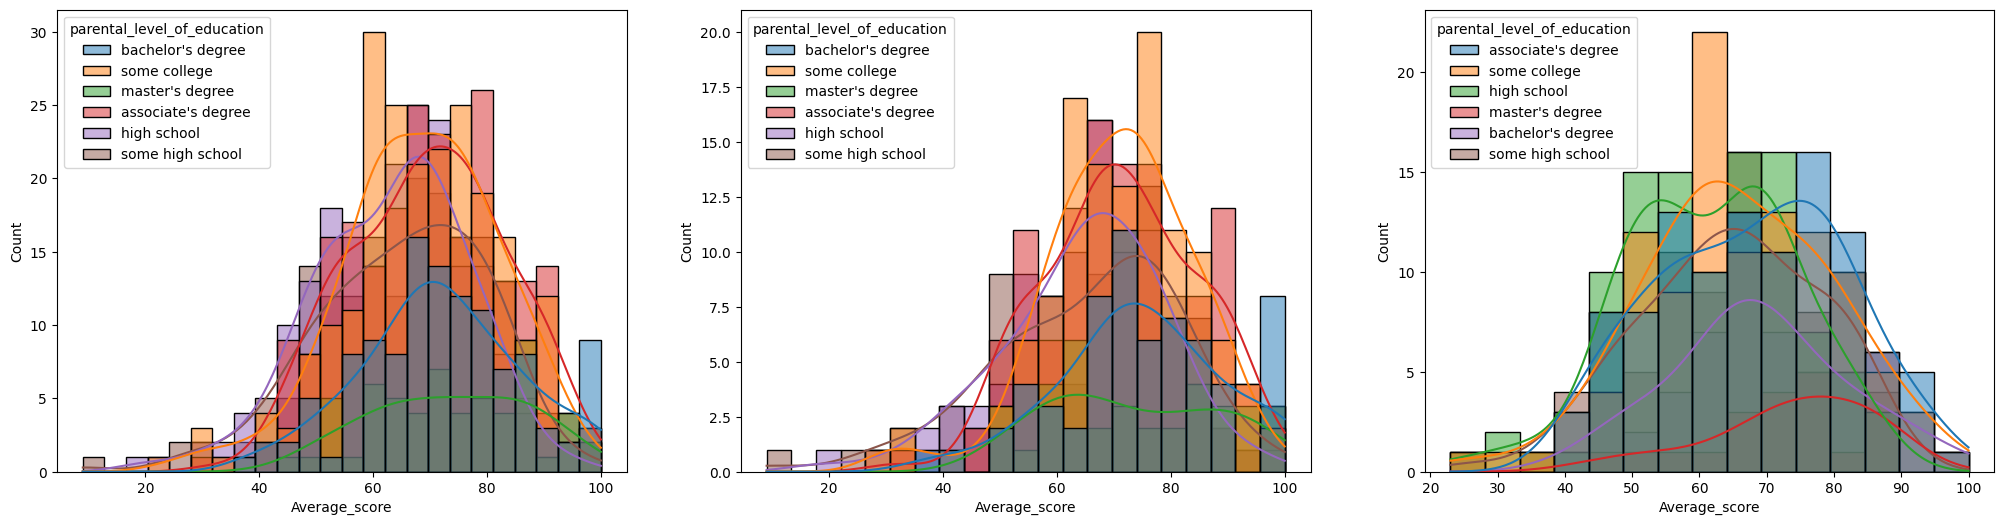

In [139]:
fig,axis=plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='Average_score',kde=True,hue='parental_level_of_education')   # for all the student male and female
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='Average_score',kde=True,hue='parental_level_of_education')          # only for female
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='Average_score',kde=True,hue='parental_level_of_education')

#### Insights: <br>
In general parent's education don't help student perform well in exam.<br>
3rd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam<br>
2nd plot we can see there is no effect of parent's education on female students.<br>

<Axes: xlabel='Average_score', ylabel='Count'>

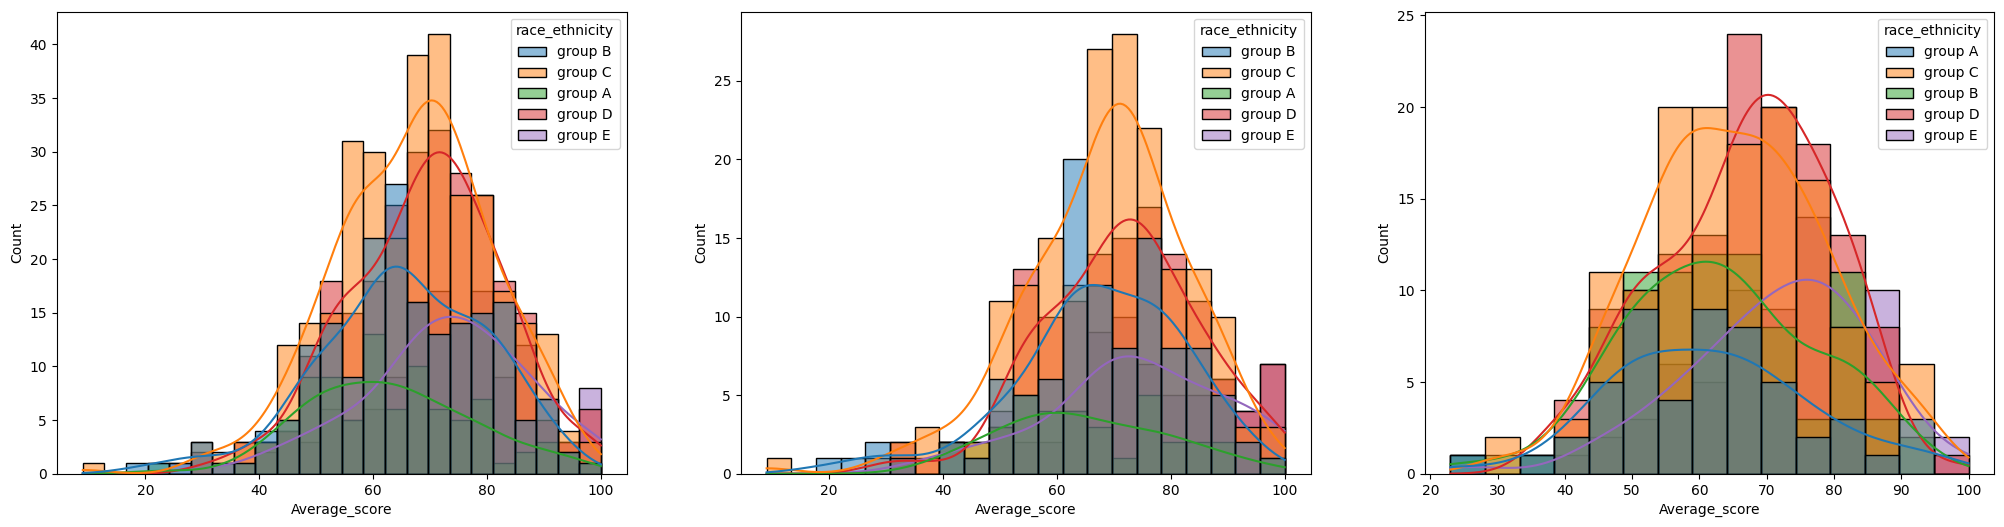

In [140]:
fig,axis=plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='Average_score',kde=True,hue='race_ethnicity')   # for all the student male and female
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='Average_score',kde=True,hue='race_ethnicity')          # only for female
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='Average_score',kde=True,hue='race_ethnicity')         # only for male

#####  Insights: <br>
- Students of group A and group B tends to perform poorly in exam.<br>
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female<br>

<Axes: >

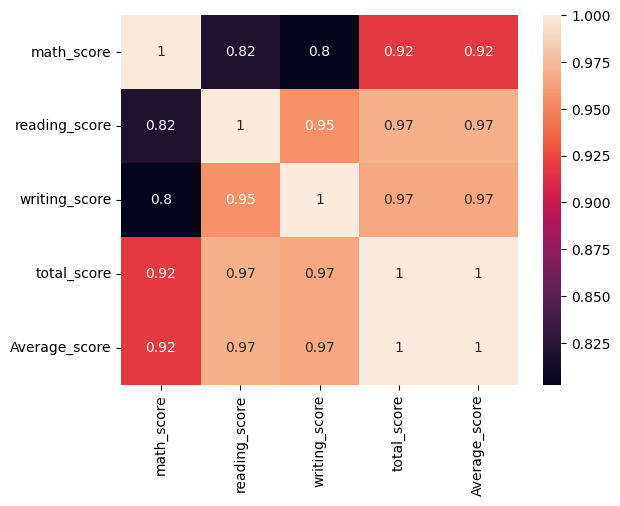

In [144]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include='number')

# Create a heatmap using Seaborn
sns.heatmap(numeric_columns.corr(), annot=True)

In [142]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
